In [46]:
import pandas as pd
hr = pd.read_csv('datasets_9768_13874_HR_comma_sep.csv')

In [47]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [48]:
col_names = hr.columns.tolist()

In [49]:
col_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [50]:
hr=hr.rename(columns = {'sales':'department'})

In [51]:
col_names = hr.columns.tolist()
col_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

In [52]:
hr.shape

(14999, 10)

In [53]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [54]:
import  numpy as np

In [55]:
hr["department"]=np.where(hr['department']=='support','technical',hr['department'])
hr["department"]=np.where(hr['department']=='IT','technical',hr['department'])

In [56]:
cat_vars=['department','salary']

In [57]:
for var in cat_vars:
    cat_list='var'+"_"+var
    cat_list=pd.get_dummies(hr[var],prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [58]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department', 'salary',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [59]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [60]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [61]:
X

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [62]:
columns = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years',
    'department_RandD',
    'department_accounting',
    'department_hr',
    'department_management',
    'department_marketing',
    'department_product_mng',
    'department_sales',
    'department_technical',
    'salary_high',
    'salary_low',
    'salary_medium'
]
columns_dict={column:index for index,column in enumerate(columns)}


In [63]:
columns_dict

{'satisfaction_level': 0,
 'last_evaluation': 1,
 'number_project': 2,
 'average_montly_hours': 3,
 'time_spend_company': 4,
 'Work_accident': 5,
 'promotion_last_5years': 6,
 'department_RandD': 7,
 'department_accounting': 8,
 'department_hr': 9,
 'department_management': 10,
 'department_marketing': 11,
 'department_product_mng': 12,
 'department_sales': 13,
 'department_technical': 14,
 'salary_high': 15,
 'salary_low': 16,
 'salary_medium': 17}

In [64]:
column_dict = {}

index=0

for column in columns:
    column_dict[column]=index
    index+=1
    

In [65]:
print(column_dict)

{'satisfaction_level': 0, 'last_evaluation': 1, 'number_project': 2, 'average_montly_hours': 3, 'time_spend_company': 4, 'Work_accident': 5, 'promotion_last_5years': 6, 'department_RandD': 7, 'department_accounting': 8, 'department_hr': 9, 'department_management': 10, 'department_marketing': 11, 'department_product_mng': 12, 'department_sales': 13, 'department_technical': 14, 'salary_high': 15, 'salary_low': 16, 'salary_medium': 17}


In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression()

# Create the RFE object, selecting 10 features
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE on your data (X for features, y for target)
rfe = rfe.fit(hr[X], hr[y])

# Display the results
print(rfe.support_)  # Shows which features are selected
print(rfe.ranking_)  # Ranks the features based on their importance


C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed w

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

In [70]:
from sklearn.model_selection import train_test_split  # Updated import

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7706666666666667


In [71]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.771


In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.978


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



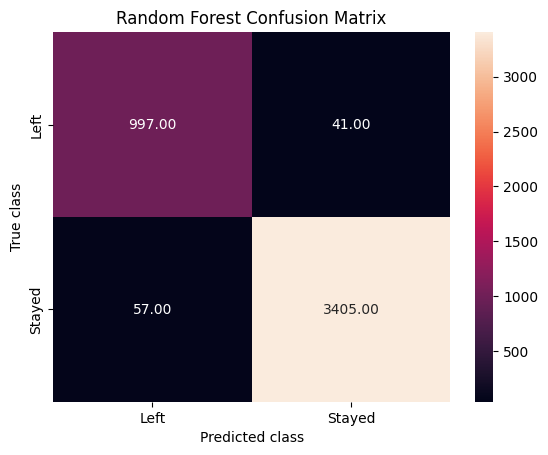

In [76]:
y_pred = rf.predict(X_test)  # Assuming 'rf' is your trained random forest model

# Import confusion matrix from sklearn and seaborn for heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
forest_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plot confusion matrix using seaborn's heatmap
sns.heatmap(forest_cm, annot=True, fmt='.2f', xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [77]:
print(classification_report(y_test, logreg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



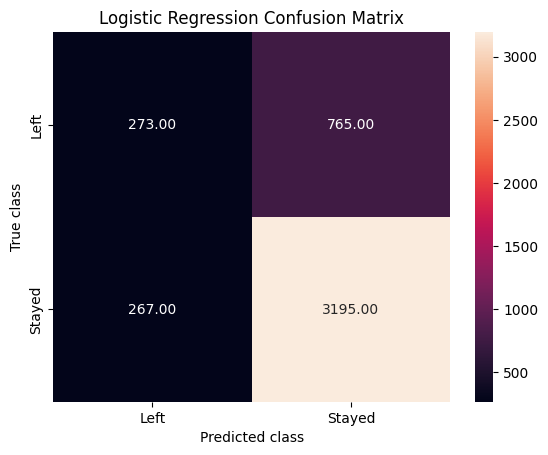

In [79]:
logreg_y_pred = logreg.predict(X_test)

# Generate confusion matrix with correct parameter usage
logreg_cm = metrics.confusion_matrix(y_test, logreg_y_pred, labels=[1, 0])

# Visualize the confusion matrix with seaborn heatmap
sns.heatmap(logreg_cm, annot=True, fmt='.2f', xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


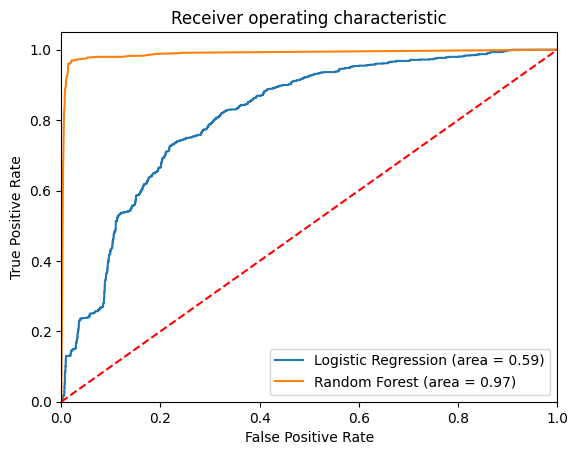

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [81]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.23%
department_management-0.27%
department_hr-0.29%
department_RandD-0.31%
salary_high-0.78%
salary_low-1.24%
Work_accident-1.52%
last_evaluation-18.32%
time_spend_company-26.77%
satisfaction_level-50.24%
